In [1]:
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup()

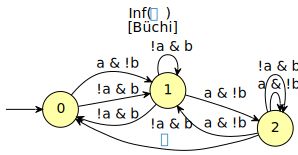

In [2]:
unused_example=spot.automaton("""
HOA: v1
States: 3
Start: 0
name: "Hello world"
AP: 2 "a" "b"
properties: trans-acc
Acceptance: 1 Inf(0)
--BODY--
State: 0
[ 0&!1] 0
[ 0&!1] 2
[!0& 1] 1
State: 1
[ 0&!1] 0 {0}
[!0& 1] 1
State: 2
[ 0&!1] 2 {0}
--END--
""")
example=spot.automaton("""
HOA: v1
States: 3
Start: 0
name: "Hello world"
AP: 2 "a" "b"
properties: trans-acc
Acceptance: 1 Inf(0)
--BODY--
State: 0
[ 0&!1] 1
[!0& 1] 1
State: 1
[!0& 1] 0
[!0& 1] 1
[ 0&!1] 2
State: 2
[ 0&!1] 2
[!0& 1] 2
[ 0&!1] 1
[!0& 1] 0 {0}
--END--
""")
example.save("example_for_slim.hoa")

In [21]:
# Build the slim automaton using the local copy of seminator
! ../seminator --slim --pure --scc-aware=0 example_for_slim.hoa > slim.hoa
# Build the semi-deterministic automaton using the installed version of seminator
! seminator --tba --pure --scc-aware=0 --postprocess=0 example_for_slim.hoa > semi_deterministic.hoa

### Display automata
For a display side-by-side we use the display_inline function from Spot. We can see all the three automata there.

In [22]:
slim = spot.automaton("slim.hoa")
semidet = spot.automaton("semi_deterministic.hoa")
display_inline(example, slim, semidet)

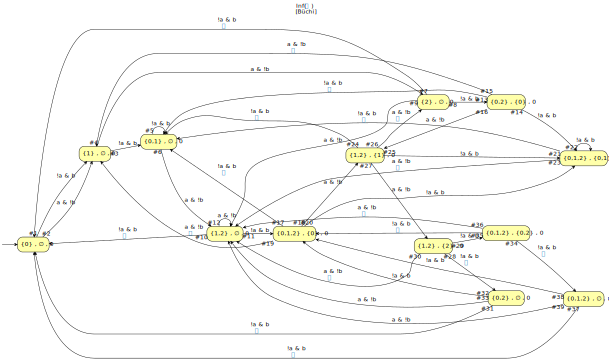

In [23]:
# Display the slim automaton with edge-numbers, we will use that for highlighting
slim.show(".#")

Below, the orange edge should not exist in the slim automaton. In case we reach a break-point, "slim-edges" are not created.

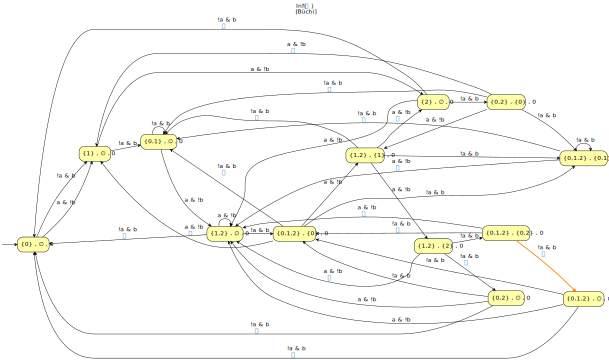

In [24]:
slim.highlight_edges([34], 2)